## Task 1: Collect and pre-process datasets of facial expressions captured in different contexts (e.g., cultural variations, lighting conditions).


In [2]:
import matplotlib.pyplot as plt
from glob import glob
import cv2 as cv
import os
import random
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf

In [3]:
print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.17.0


<h3>Exploring dataset</h3>

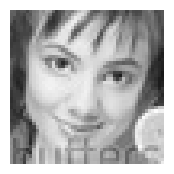

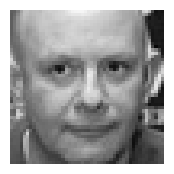

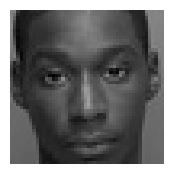

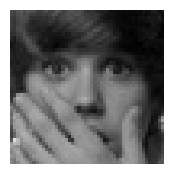

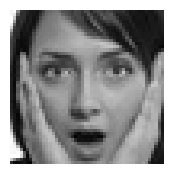

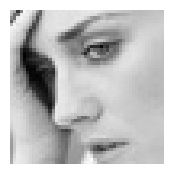

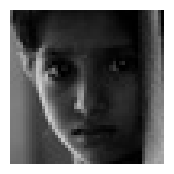

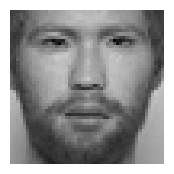

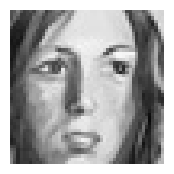

In [4]:
images = glob("train/**/**") # to conver the images in train to a list
for i in range(1,10):
    image = random.choice(images)
    plt.figure(figsize= (2,2))
    plt.imshow(cv.imread(image))
    plt.axis("off")


### Data Preprocessing

In [5]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size = (img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size, 
                                                    class_mode = "categorical",
                                                    shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size = (img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)




Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Task 2: Train separate models for each context or develop a multi-context model that adapts its predictions based on additional input data (e.g., location, cultural background).


### Defining model

In [6]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
                     
    return x

In [7]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x
                     

In [8]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32, (3,3))
    conv_2 = Convolution(inputs,64, (5,5))
    conv_3 = Convolution(conv_2,128, (3,3))
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten , 256)
    
    output = Dense(7, activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model 

In [9]:
model = model_fer((48, 48, 1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,797,959 (18.30 MB)

 Trainable params: 4,797,063 (18.30 MB)

 Non-trainable params: 896 (3.50 KB)

### Initializing the model


In [10]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps =  validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5", monitor = "val_accuracy", save_weights_only = True, mode = "max", verbose = 1)
callbacks = [checkpoint]

### training the model 

In [11]:
history = model.fit(
    x = train_generator, 
    steps_per_epoch = steps_per_epoch,
    epochs = epochs, 
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks
)

Epoch 1/15


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.3269 - loss: 1.7974
Epoch 1: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 86s 190ms/step - accuracy: 0.3270 - loss: 1.7970 - val_accuracy: 0.4051 - val_loss: 1.5526
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:21 182ms/step - accuracy: 0.4844 - loss: 1.3901
Epoch 2: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step - accuracy: 0.4844 - loss: 1.3901 - val_accuracy: 0.4000 - val_loss: 1.4557
Epoch 3/15


2024-08-04 15:13:02.428349: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-08-04 15:13:02.454905: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.4825 - loss: 1.3542
Epoch 3: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.4825 - loss: 1.3541 - val_accuracy: 0.3948 - val_loss: 1.5326
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:27 196ms/step - accuracy: 0.4688 - loss: 1.4465
Epoch 4: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.4688 - loss: 1.4465 - val_accuracy: 0.6000 - val_loss: 1.3931
Epoch 5/15


2024-08-04 15:14:30.863512: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.5387 - loss: 1.2149
Epoch 5: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 91s 203ms/step - accuracy: 0.5387 - loss: 1.2149 - val_accuracy: 0.5096 - val_loss: 1.2813
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:21 181ms/step - accuracy: 0.5781 - loss: 1.0602
Epoch 6: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 133us/step - accuracy: 0.5781 - loss: 1.0602 - val_accuracy: 0.7000 - val_loss: 0.7269
Epoch 7/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.5887 - loss: 1.1039
Epoch 7: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 95s 213ms/step - accuracy: 0.5887 - loss: 1.1040 - val_accuracy: 0.4668 - val_loss: 1.4495
Epoch 8/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:19 179ms/step - accuracy: 0.5156 - loss: 1.3118
Epoch 8: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 132us/step - accuracy: 0.5156 - loss: 1.3118 - val_accuracy: 0.4000 - val_loss: 2.2801
Epoch 9/1

2024-08-04 15:17:37.765824: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.6260 - loss: 1.0102
Epoch 9: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 97s 216ms/step - accuracy: 0.6260 - loss: 1.0102 - val_accuracy: 0.5233 - val_loss: 1.2665
Epoch 10/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:33 210ms/step - accuracy: 0.6719 - loss: 0.9033
Epoch 10: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 134us/step - accuracy: 0.6719 - loss: 0.9033 - val_accuracy: 0.6000 - val_loss: 1.0584
Epoch 11/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.6659 - loss: 0.9068
Epoch 11: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 93s 208ms/step - accuracy: 0.6659 - loss: 0.9069 - val_accuracy: 0.4918 - val_loss: 1.3555
Epoch 12/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:27 195ms/step - accuracy: 0.5469 - loss: 1.1387
Epoch 12: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.5469 - loss: 1.1387 - val_accuracy: 0.6000 - val_loss: 1.3766
Epo

# Task 3: .Evaluate the model's ability to generalize across different contexts and identify challenges involved.

### Evaluating the modeL

In [12]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5149 - loss: 1.3781


[1.3644622564315796, 0.5239620804786682]

### plotting the loss and accuracy

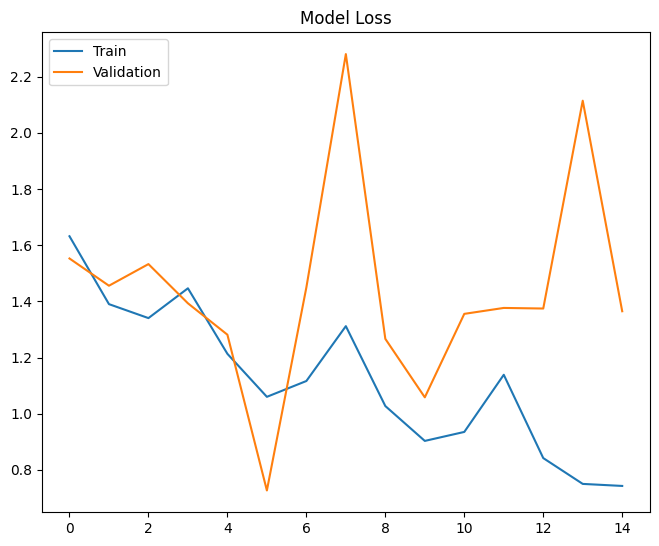

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35 ) 

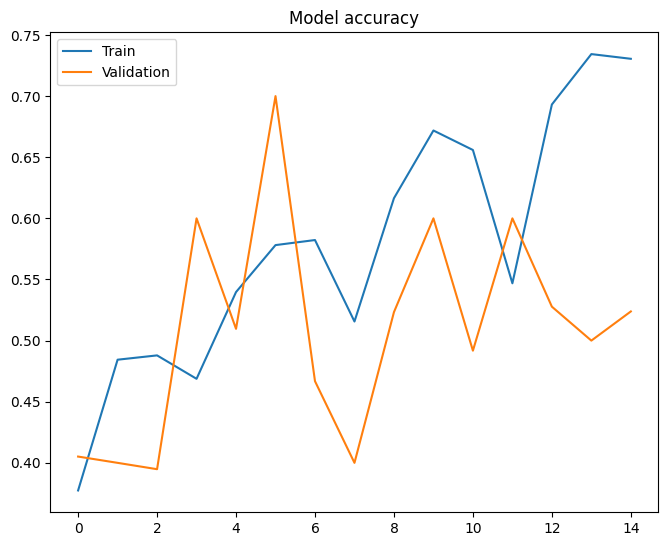

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35 )

## Saving the model

In [14]:
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)

In [17]:
print("Accuracy of the model: ",history.history['accuracy'][-1]
)

Accuracy of the model:  0.7305288910865784
